In [1]:
import numpy as np
import pandas as pd

import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.weightstats import DescrStatsW
from scipy import stats
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')

In [2]:
img_path = 'S:\\123\\333\\'

### Сформувати тестову вибірку зображень з вихідного пакету

In [3]:
os.chdir(img_path)
np.random.seed(4)
files = [f for f in os.listdir() if f.endswith('.jpg')]

In [4]:
n_samples = 250
sample = np.random.choice(files,n_samples)
print(len(sample))

250


### Для зеленого каналу кольору тестових зображень обчислити наступні характеристики розподілу значень яскравості пікселів:

Математичне очікування та дисперсію; <br>
Медіану та інтерквартильний розмах;<br>
Коефіцієнти асиметрії та ексцесу (нормалізований);<br>
Гістограму значень яскравості пікселів (нормалізовану);<br>


In [5]:
green_samples = np.array([cv2.split(cv2.imread(img_path+x))[1] for x in sample])
green_pixels = np.concatenate([im.flatten() for im in green_samples])

##### Математичне очікування та дисперсію;

In [6]:
mean = [np.mean(x) for x in green_samples]
print(f'Мат. очікування: {mean}')
var = [np.var(x) for x in green_samples]
print(f'Дисперсія: {var}')

Мат. очікування: [90.26035329341317, 150.93814933333334, 119.0943377308707, 107.0248948948949, 106.339568, 193.38831736526947, 82.55546198830409, 119.20850802139037, 130.7386978417266, 83.80040533333333, 93.83324444444445, 129.90019733333332, 160.74073873873874, 144.57634133333335, 124.01497560975609, 148.045396011396, 61.197936, 104.19627627627628, 141.64254054054055, 139.98941554959785, 105.98046385542169, 103.358432, 69.191568, 133.00029333333333, 115.39297313432836, 78.27387987987989, 81.25281081081081, 92.36262962962962, 171.4614385026738, 110.92799361022364, 54.95171171171171, 174.85400600600602, 74.01533333333333, 132.77456456456457, 192.65949262536873, 108.58461866666667, 75.29812, 64.70842126789366, 68.210368, 76.00725153374233, 118.44698203592814, 166.50037305699482, 129.2221201201201, 170.745376, 72.66633066666667, 35.070996996996996, 94.257108, 103.17833633633633, 78.17431231231231, 168.7009597855228, 106.161808, 80.38497005988025, 111.77003614457831, 43.100702702702705, 10

##### Медіану та інтерквартильний розмах;

In [7]:
median = [np.median(x) for x in green_samples]
print(f'Медіана: {median}')
irq = [stats.iqr(x) for x in green_samples]
print(f'Інтерквартильний розмах: {irq}')

Медіана: [68.0, 156.0, 110.0, 103.0, 120.0, 222.0, 79.0, 115.0, 117.0, 80.0, 105.0, 131.0, 169.0, 131.0, 95.0, 151.0, 70.0, 96.0, 149.0, 146.0, 101.0, 105.0, 43.0, 146.0, 102.0, 82.0, 62.0, 83.0, 188.0, 89.0, 46.0, 193.0, 61.0, 126.0, 209.0, 95.0, 55.0, 46.0, 67.0, 59.0, 140.0, 171.0, 128.0, 178.0, 57.0, 24.0, 88.0, 85.0, 56.0, 255.0, 106.0, 58.0, 116.0, 23.0, 96.0, 157.0, 119.0, 65.0, 77.0, 74.0, 38.0, 138.0, 154.0, 157.0, 4.0, 67.0, 67.0, 121.0, 146.0, 19.0, 128.0, 130.0, 77.0, 176.0, 82.0, 72.0, 84.0, 121.0, 202.0, 89.0, 113.0, 184.0, 43.0, 61.0, 57.0, 62.0, 51.0, 220.0, 148.0, 142.0, 120.0, 0.0, 40.0, 216.0, 98.0, 118.0, 70.0, 38.0, 186.0, 154.0, 195.0, 98.0, 165.0, 98.0, 165.0, 115.0, 11.0, 86.0, 112.0, 121.0, 10.0, 113.0, 109.0, 152.0, 30.0, 159.0, 92.0, 145.0, 56.0, 102.0, 76.0, 91.0, 100.0, 185.0, 96.0, 74.0, 105.0, 150.0, 82.0, 157.0, 59.0, 144.0, 96.0, 44.0, 43.0, 35.0, 33.0, 104.0, 34.0, 183.0, 43.0, 69.0, 71.0, 166.0, 36.0, 42.0, 254.0, 103.0, 98.0, 146.0, 38.0, 65.0, 92.0,

###### Коефіцієнти асиметрії та ексцесу (нормалізований);

In [8]:
kurtosis = [stats.kurtosis(x.flatten()) for x in green_samples]
print(f'Коефіцієнт eксцесу: {kurtosis}')
skew = [stats.skew(x.flatten()) for x in green_samples]
print(f'Коефіцієнт асиметрії: {skew}')

Коефіцієнт eксцесу: [-1.3799109086450385, -1.1835445938581965, -1.129903635258343, 0.8769026965433651, -0.7698461463022217, 0.9353926719342267, 0.6979875224809415, 0.3985034543578321, -0.009457056877963499, 0.4158074203910349, -1.4208924376977, -0.7281586051910724, 1.0233831811320488, -0.7046437359707522, -1.0944574654796555, -0.6624475998403905, 4.730215809694213, -0.8038872163953945, -0.4939872607363198, -0.7501858172950833, 1.2318284389905019, -0.5683045203428336, 0.26365645294002427, -0.49939544605083785, -0.36163769156478853, -0.853994069636157, -0.14301020215915328, -0.3985580162722049, 0.31625424744119, -1.2870009472638517, 3.389887004049106, 3.722859286943586, -0.11799944038624544, -0.9998486965932836, 4.332173645278884, -0.8629697239333418, 0.5556560241496511, 2.9068763942061935, 1.615008059938127, -0.1911377821660305, -1.1750414883072042, -1.5737931465941337, 1.419200032477895, 3.4216921148844897, 0.8578994519022047, 7.87478098424369, 4.105477207786775, -1.361409998948107, -0

In [9]:
bincount = np.bincount(green_pixels)
green_pixels_value_counts = np.zeros(256,dtype=int)
green_pixels_value_counts[:bincount.shape[0]] = bincount

###### Гістограму значень яскравості пікселів (нормалізовану);

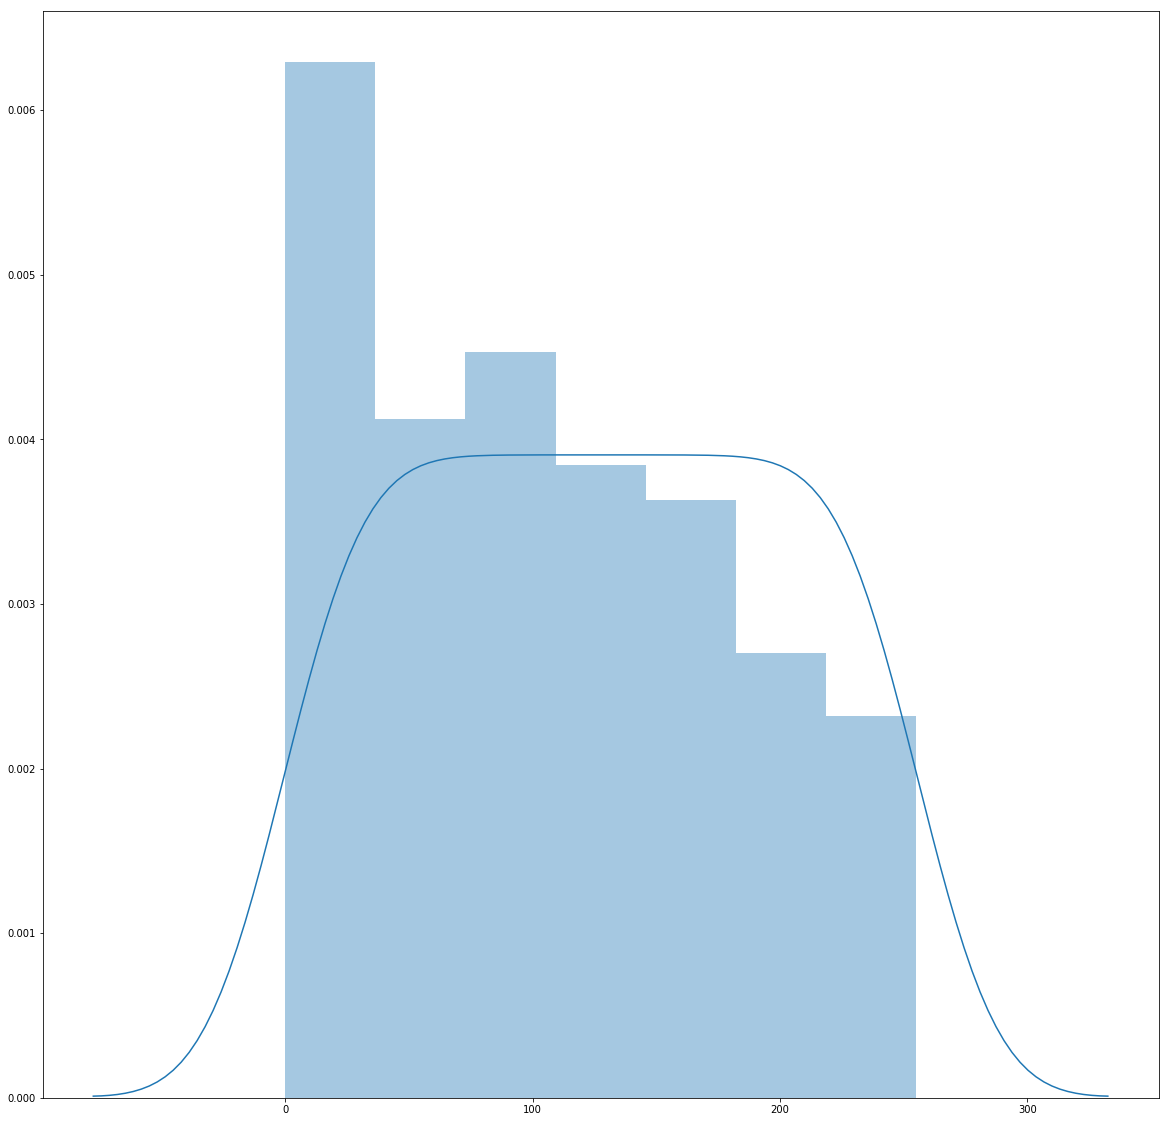

In [10]:
plt.figure(figsize=(20,20))
sns.distplot(np.arange(256),hist_kws={'weights':green_pixels_value_counts})

### Провести обробку отриманих гістограм <br>
####    Провести апроксимацію гістограм з використанням імовірнісних розподілів: <br>
######      Нормального (гаусового) розподілу; <br>
######      Розподілу Лапласа; <br>
######      Розподілу Стьюдента; <br>
######      Бета розподілу; <br>
#### Для кожної гістограми визначити найкращий тип апроксимуючого розподілу за критерієм мінімізації середньо квадратичного відхилення;<br>
#### Побудувати розподіл отриманих апроксимацій за видом апроксимуючого розподілу;<br>

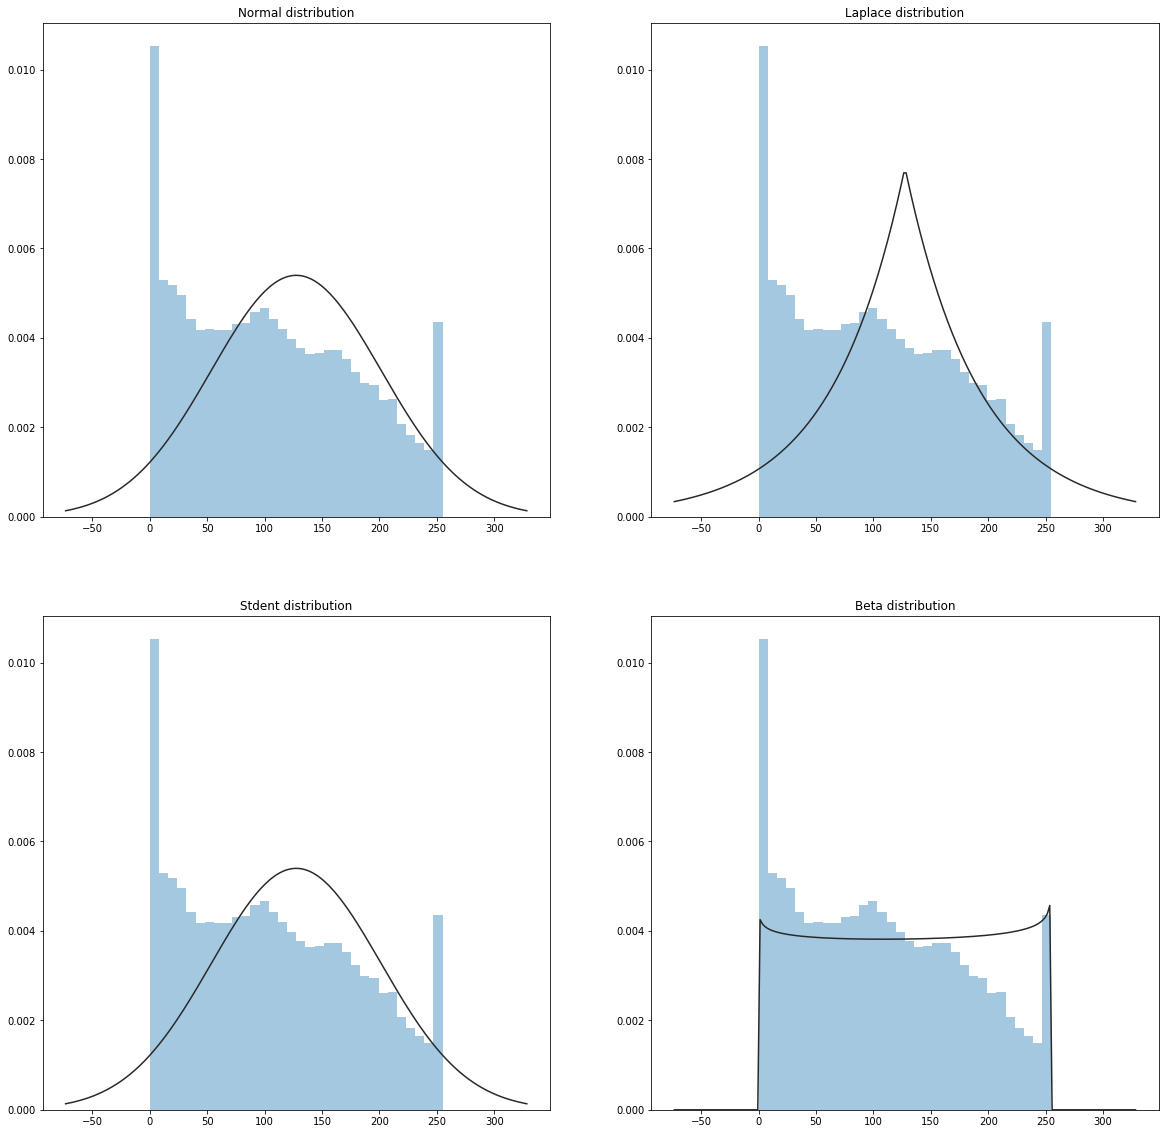

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.title("Normal distribution")
sns.distplot(np.arange(256), bins=32, hist_kws={'weights':green_pixels_value_counts},norm_hist=True,fit=stats.norm,kde=False)
plt.subplot(222)
plt.title("Laplace distribution")
sns.distplot(np.arange(256), bins=32, hist_kws={'weights':green_pixels_value_counts},norm_hist=True,fit=stats.laplace,kde=False)
plt.subplot(223)
plt.title("Stdent distribution")
sns.distplot(np.arange(256), bins=32, hist_kws={'weights':green_pixels_value_counts},norm_hist=True,fit=stats.t,kde=False)
plt.subplot(224)
plt.title("Beta distribution")
sns.distplot(np.arange(256), bins=32, hist_kws={'weights':green_pixels_value_counts},norm_hist=True,fit=stats.beta,kde=False)


###### Для кожної гістограми визначити найкращий тип апроксимуючого розподілу за критерієм мінімізації середньо квадратичного відхилення;

In [12]:
def get_dist(dist):
    bincount = np.bincount(dist)
    pixels_value_counts = np.zeros(256,dtype=int)
    pixels_value_counts[:bincount.shape[0]] = bincount
    b_dist = pixels_value_counts
    lin_space = np.linspace(0,255,num=256)
    norm = stats.norm.pdf(lin_space,*stats.norm.fit(b_dist))
    laplace = stats.laplace.pdf(lin_space,*stats.laplace.fit(b_dist))
    t = stats.t.pdf(lin_space,*stats.t.fit(b_dist))
    beta = stats.beta.pdf(lin_space,*stats.beta.fit(b_dist))
    mse = {'norm': mean_squared_error(b_dist,norm*b_dist.sum()), 'laplace': mean_squared_error(b_dist,laplace*b_dist.sum()),'t': mean_squared_error(b_dist,t*b_dist.sum()), 'beta': mean_squared_error(b_dist,beta*b_dist.sum())}
    return (min(mse, key=lambda x: mse[x]),mse[min(mse, key=lambda k: mse[k])])
best_dists = [get_dist(x.flatten()) for x in green_samples]

In [13]:
for i,d in enumerate(best_dists):
    print(f'Image {i} best distribution {d[0]}')

Image 0 best distribution beta
Image 1 best distribution beta
Image 2 best distribution laplace
Image 3 best distribution t
Image 4 best distribution laplace
Image 5 best distribution t
Image 6 best distribution laplace
Image 7 best distribution laplace
Image 8 best distribution t
Image 9 best distribution laplace
Image 10 best distribution laplace
Image 11 best distribution laplace
Image 12 best distribution laplace
Image 13 best distribution t
Image 14 best distribution beta
Image 15 best distribution beta
Image 16 best distribution t
Image 17 best distribution norm
Image 18 best distribution norm
Image 19 best distribution norm
Image 20 best distribution t
Image 21 best distribution t
Image 22 best distribution t
Image 23 best distribution beta
Image 24 best distribution laplace
Image 25 best distribution beta
Image 26 best distribution laplace
Image 27 best distribution beta
Image 28 best distribution t
Image 29 best distribution beta
Image 30 best distribution t
Image 31 best dist

###### Побудувати розподіл отриманих апроксимацій за видом апроксимуючого розподілу;


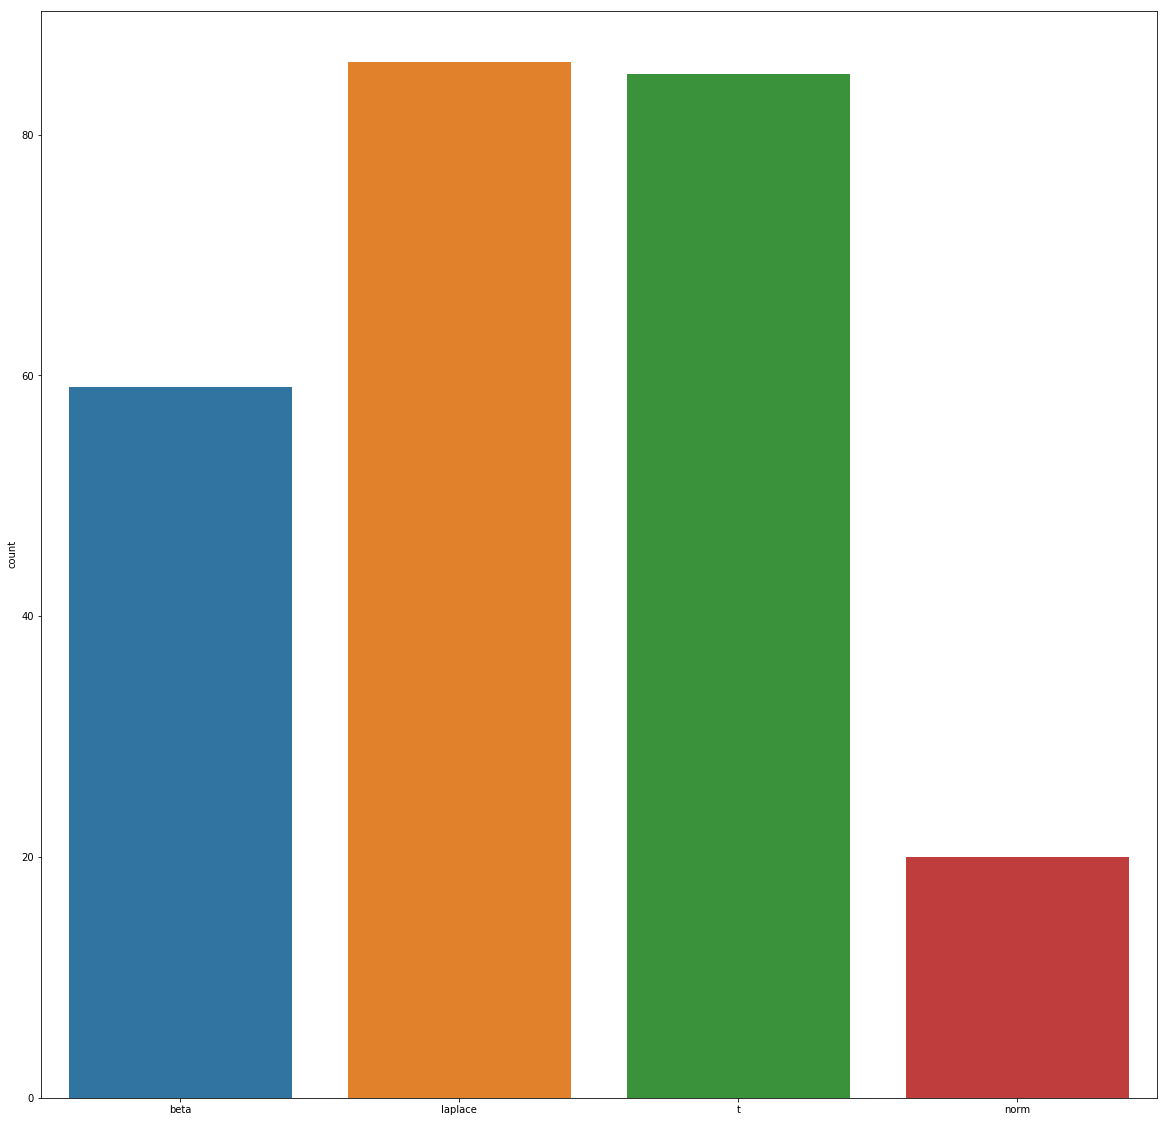

In [14]:
plt.figure(figsize=(20,20))
sns.countplot([x[0] for x in best_dists]);

### Побудувати багатовимірні гаусові моделі:


##### Cформувати вектори параметрів розподілу значень яскравості пікселів тестових зображень

###### Математичне очікування; <br>
###### Математичне очікування та дисперсія; <br>
###### Математичне очікування, дисперсія та коефіцієнт асиметрії;<br>
###### Математичне очікування, дисперсія, коефіцієнти асиметрії та ексцесу;<br>


#### Визначити параметри багатовимірних гаусових моделей для кожної групи векторів, відобразити їх графічно та у вигляді таблиць

Математичне очікування;

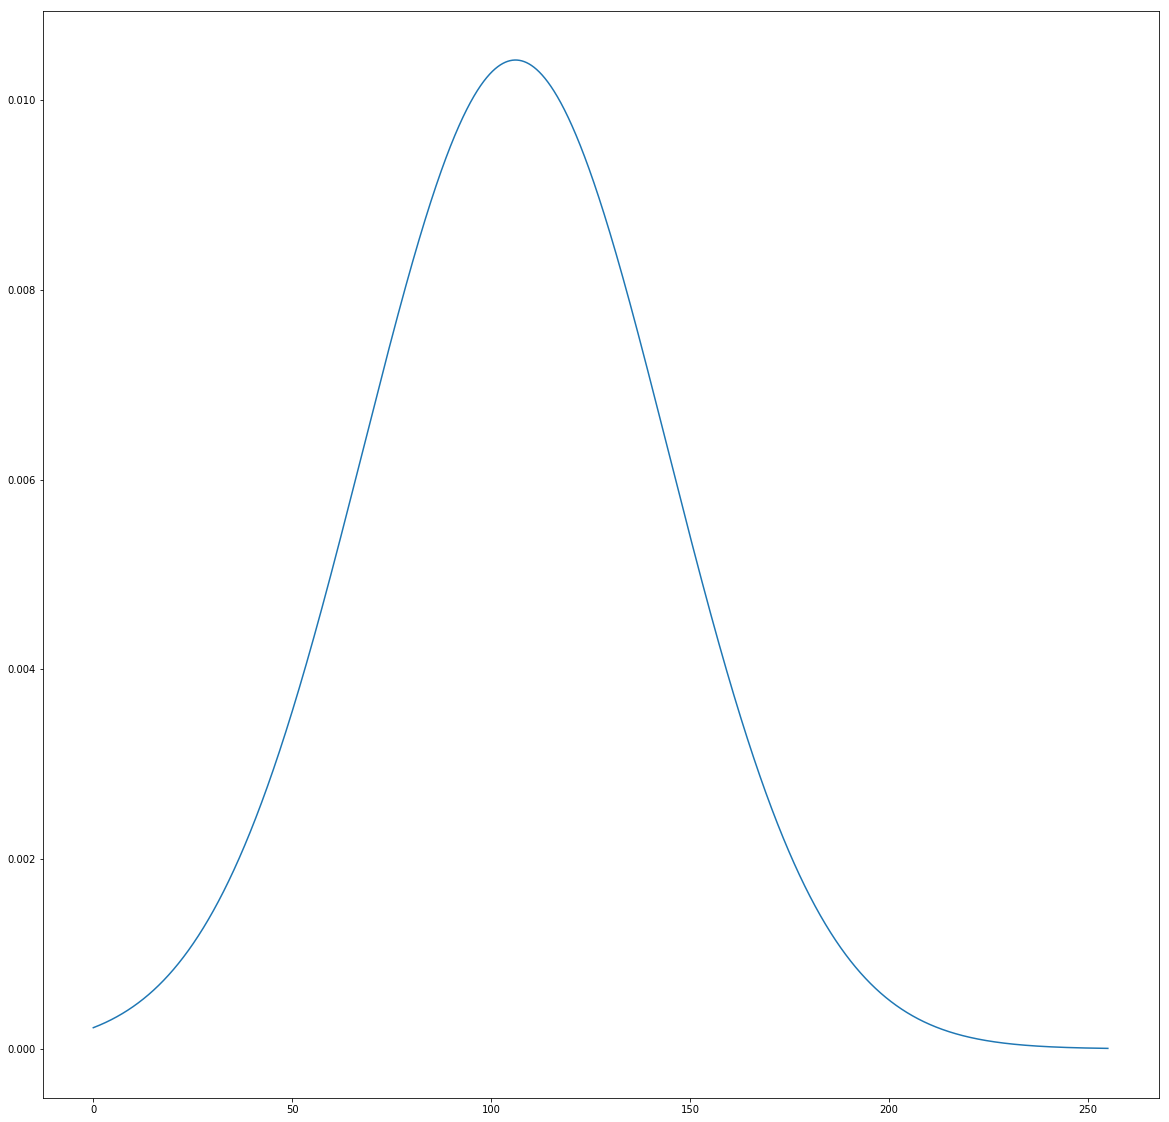

In [15]:
vec_mean = np.mean(mean)
cov = np.cov(mean)
x = np.linspace(0,255,5100)
y = stats.norm.pdf(x,vec_mean,cov**0.5)

plt.figure(figsize=(20,20))
plt.plot(x,y)

Математичне очікування та дисперсія;

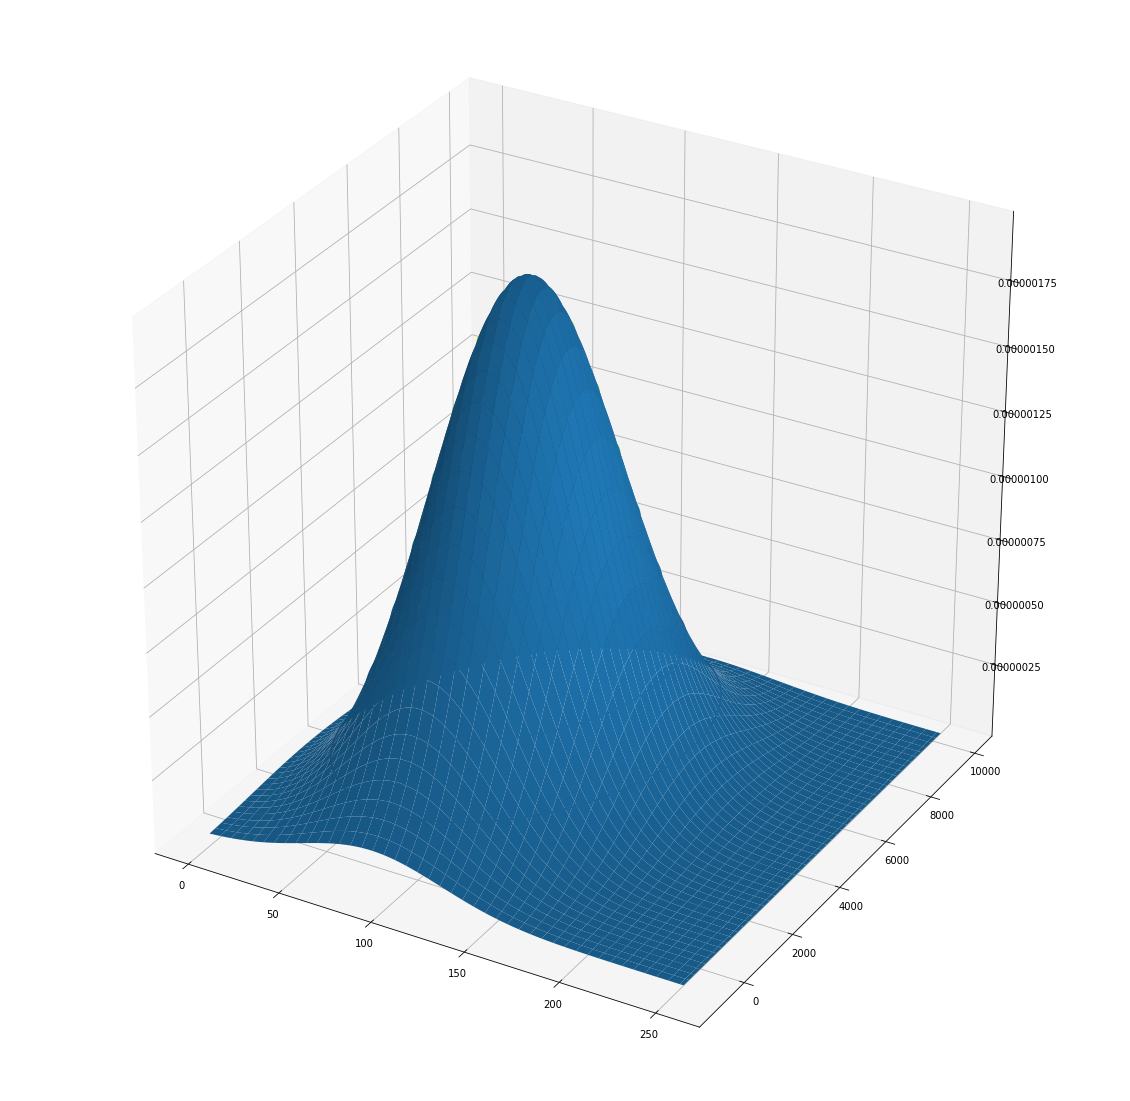

In [16]:
temp = np.vstack((mean,var))
vec_mean = np.mean(temp,axis=1)
cov = np.cov(temp)
x,y = np.mgrid[0:255, -1000:10000]
space = np.empty(x.shape+(2,))
space[:,:,0]=x
space[:,:,1]=y
z = stats.multivariate_normal.pdf(space,vec_mean,cov)
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z)
plt.contour(x,y,z)
plt.show()

Математичне очікування, дисперсія та коефіцієнт асиметрії;

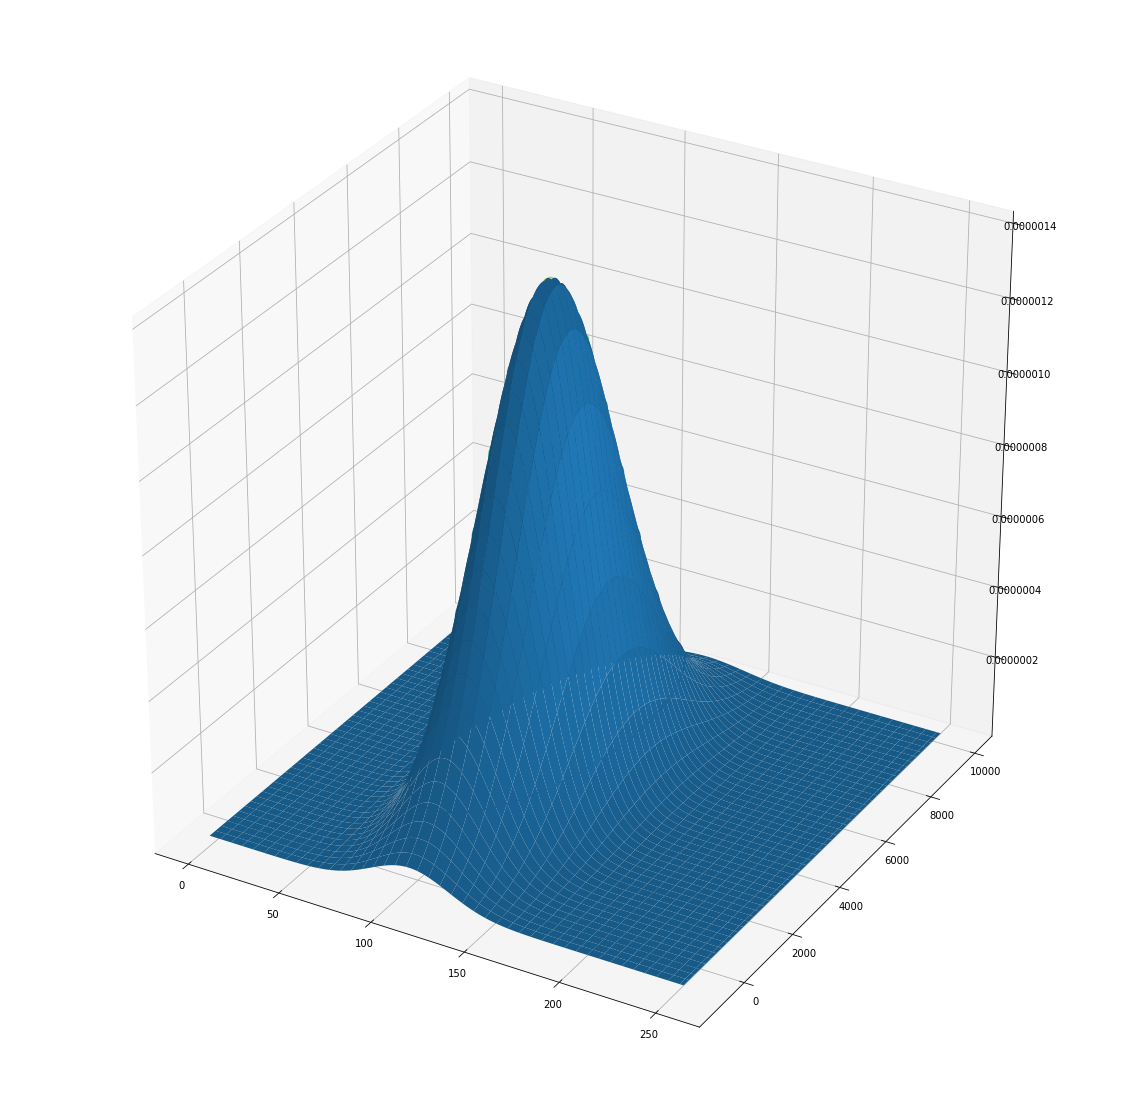

In [17]:
temp = np.vstack((mean,var,skew))
vec_mean = np.mean(temp,axis=1)
cov = np.cov(temp)
x,y = np.mgrid[0:255, -1000:10000]
space = np.empty(x.shape+(3,))
space[:,:,0]=x
space[:,:,1]=y
z = stats.multivariate_normal.pdf(space,vec_mean,cov)
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z)
plt.contour(x,y,z)
plt.show()

Математичне очікування, дисперсія, коефіцієнти асиметрії та ексцесу;

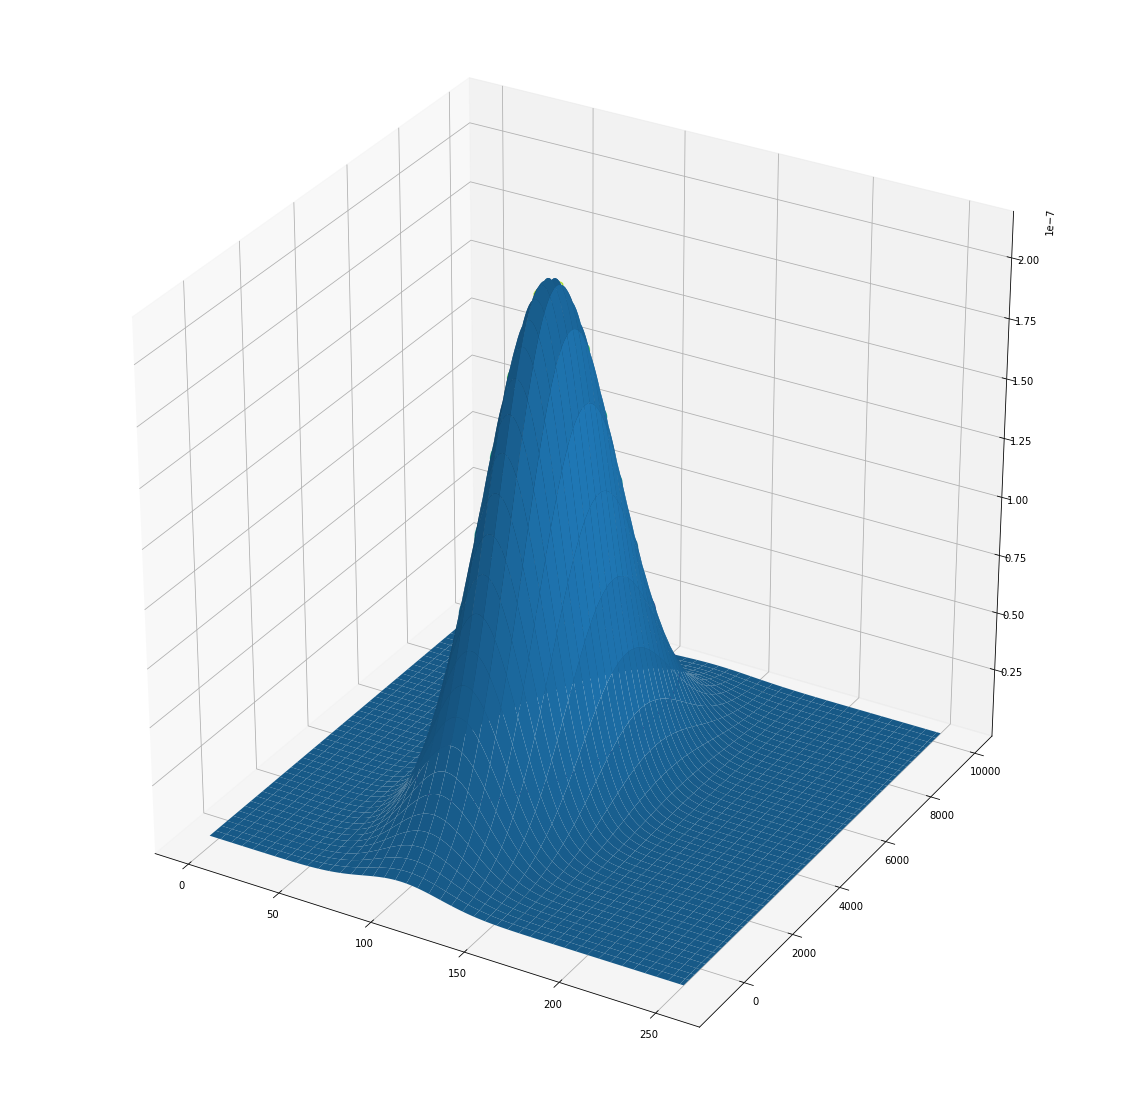

In [18]:
temp = np.vstack((mean,var,skew,kurtosis))
vec_mean = np.mean(temp,axis=1)
cov = np.cov(temp)
x,y = np.mgrid[0:255, -1000:10000]
space = np.empty(x.shape+(4,))
space[:,:,0]=x
space[:,:,1]=y
z = stats.multivariate_normal.pdf(space,vec_mean,cov)
fig = plt.figure(figsize=(20,20))
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z)
plt.contour(x,y,z)
plt.show()